## Project_2: Drivers of HDB Resale Price and Prediction
- 01 Defining the Problem Statement & Data Cleaning

#### Content
> * [Problem Statement](#problem_statement) 
> * [Data Cleaning](#data_cleaning)
> * [EDA](#eda)
> * [Preprocessing and Modeling](#preprocessing_and_modeling)
> * [Evaluation and Conceptual Understanding](#evaluation_and_conceptual_understanding)
> * [Conclusion and Recommendations](#conclusion_and_recommendations)

---
<a id='problem_statement'></a>
## Problem Statement

Over the years, Singapore has seen the puzzling rise of public housing in the resale market with million dollar price tags, supporting the theory that “decent gains” can still be acquired, especially for HDB flats bought at subsidised prices from the Government. What are the factors contributing to high upside potential for these units? 

Research Findings: Property value is affected by the confluence of macro and micro, demand and supply factors.  

<details><summary> (1) Demand-pull inflation caused by shifts in socio-demographic micro-trends. </summary>
- Many young couples are willing to pay a premium to acquire a resale flat to avoid delaying plans to start a family. 
- More millenials are also opting to remain single and aspire to move out of their nests before they are eligible to purchase a BTO, to alleviate the strain on relationships and their mental health. Covid-19 has likely accelerated the desire to move out for many millenials.
- In response to these socio-demographic trends, the government is rethinking the 35 year-old age requirement for single Singaporeans. could elevate the demand for resale flats even further. 
- Based on a study conducted by the Ministry of Finance, Singaporeans' education, employment, wage outcomes have improved over the generations. Many are gainfully employed, as reflected in the high proportion of Singapore citizens in employment and the low unemployment rate.
</details>
<br> 
<details><summary> (2) Demand-pull inflation in the private housing market. </summary>
- Historical data on private property housing has shown that while sales volume and prices usually dip during a crisis such as a high inflation, high interest rate environment, it has not been the case for the private housing market in Singapore. More wealthy individuals from China and Hong Kong are moving into the Singapore private property market to escape XJP's common prosperity doctrine. This will drive the prices of private condominiums even higher, making it less affordable for many middle income Singaporeans. Being priced out of the private housing market, this substantial group of consumers will turn to the next best alternative - spacious resale flats. Demand for resale flats is projected to increase even more, driving resale prices even higher. 
</details>
<br> 
<details><summary> (3) Material cost-push inflation due to supply-chain disruptions, increasing costs of production. </summary>
- Supply disruptions from the Russia-Ukraine war and ongoing supply chain issues caused prices of core construction materials in Singapore, such as copper, steel, concrete, cement and bricks, to inflate and material costs are projected to remain elevated in the next few quarters. 
- Costs of production has yet to be offset by increasing productivity as digitalisation of the construction workforce is not an overnight process.
</details>
<br>
<details><summary> (4) Material cost-push inflation compounded by high-interest rates. </summary>
- As FEDs are resolute in their fight against inflation, businesses suffer amidst hawkish quantitative tightening (contractionary monetary policy). High interest rates reduce the developer’s ability to service debt, as rising costs are incurred by the organization with no corresponding increase in revenues to offset while the construction is on-going.
- These costs are likely to be passed on to home-buyers. 
</details>
<br>
You are part of the Research & Consultancy team in PropNext. Propnext would like to ride on the wave and increase the number of high-value sales and purchase transactions intermediated by PropNext agents. PropNext is looking to develop an in-house mobile application that is able to predict the selling price of HDB resale flats. The application would help real estate agents detect and look out for units with huge upside potential, so as to rake in higher commissions per sale. The team has to identify high-yield features that contribute to the appreciation of units and report their findings to the software development team in 2 weeks' time. The software developers will then communicate the requirements to the software engineers who would then build the application with the embedded predictive function in collaboration with data scientists. 

Task: Use the Singapore public housing data to create a regression model that predicts the `resale_price` of Housing Development Board (HDB) flats in Singapore.

---
<a id='data_cleaning'></a>
## Data Cleaning

Part 2 requires knowledge of Pandas, data cleaning.

*All libraries should be added here.* 

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from datetime import datetime

%matplotlib inline

*Import the data.*

In [2]:
pwd

'/Users/sherena/Documents/DSIF-SG-9_private/project_2/code'

In [3]:
ls

01_Data_Cleaning.ipynb
02_Exploratory_Data_Analysis.ipynb
03_Preprocessing_and_Modeling.ipynb
04_Evaluation_and_Conceptual_Understanding.ipynb
05_Conclusion_and Recommendations.ipynb


In [4]:
# Import data on public housing (X)
hdb_train = pd.read_csv('../data/train.csv', low_memory=False)
hdb_test = pd.read_csv('../data/test.csv', low_memory=False) 

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.options.display.max_rows = XXX

In [6]:
hdb_train.head(3)

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   

  storey_range  floor_area_sqm flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0    Model A                 2006      680000.0   
1     07 TO 09           130.0   Improved                 1987      665000.0   
2     13 TO 15           144.0  Apartment                 1997      838000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   

   Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km  \
0            1094.090418               NaN              NaN              7.0   
1             866.941448               NaN              1.0              3.0   
2            1459.579948               NaN              NaN              4.0   

   Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 NaN                1.0   
2              1762.082341                 NaN                NaN   

   Hawker_Within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   
1                7.0                  80                    77   
2                1.0                  84                    95   

   mrt_nearest_distance     mrt_name  bus_interchange  mrt_interchange  \
0            330.083069      Kallang                0                0   
1            903.659703       Bishan                1                1   
2           1334.251197  Bukit Batok                1                0   

   mrt_latitude  mrt_longitude  bus_stop_nearest_distance bus_stop_name  \
0      1.311540     103.871731                  29.427395        Blk 3B   
1      1.350580     103.848305      

In [7]:
hdb_train.shape

(150634, 77)

In [8]:
hdb_test.head(3)

id Tranc_YearMonth         town flat_type block        street_name  \
0  114982         2012-11       YISHUN    4 ROOM   173       YISHUN AVE 7   
1   95653         2019-08  JURONG WEST    5 ROOM  986C  JURONG WEST ST 93   
2   40303         2013-10   ANG MO KIO    3 ROOM   534  ANG MO KIO AVE 10   

  storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0     07 TO 09            84.0         Simplified                 1987   
1     04 TO 06           112.0  Premium Apartment                 2008   
2     07 TO 09            68.0     New Generation                 1980   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2012           11           8      7      9    8   
1        2019            8           5      4      6    5   
2        2013           10           8      7      9    8   

             full_flat_type                  address  floor_area_sqft  \
0         4 ROOM Simplified        173, YISHUN AVE 7          904.176   
1  5 ROOM Premium Apartment  986C, JURONG WEST ST 93         1205.568   
2     3 ROOM New Generation   534, ANG MO KIO AVE 10          731.952   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       34             12            1986           Y          Y   
1       13             14            2002           Y          N   
2       41             12            1979           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   132   
1             N                   N                 N                    53   
2             N                   N                 N                   218   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          92          40          0   
1           0           0           0          28          25          0   
2           0           0         191          22           1          1   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  760173  1.437066  103.831121   
1             0                  0  643986  1.336957  103.695668   
2             3                  0  560534  1.374058  103.854168   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0        Yishun             877.431572               NaN              2.0   
1   Jurong West             534.037705               NaN              1.0   
2    Ang Mo Kio             817.050453               NaN              2.0   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  \
0              4.0               687.576779                 NaN   
1              3.0              2122.346226                 NaN   
2              3.0               152.287621                 1.0   

   Hawker_Within_1km  Hawker_Within_2km  hawker_food_stalls  \
0                1.0                1.0                  56   
1                NaN                NaN                  72   
2                3.0               11.0                  50   

   hawker_market_stalls  mrt_nearest_distance    mrt_name  bus_interchange  \
0                   123            686.660434    Canberra                0   
1                    94            169.478175     Pioneer                0   
2                   100            694.220448  Ang Mo Kio                1   

   mrt_interchange  mrt_latitude  mrt_longitude  bus_stop_nearest_distance  \
0                0      1.443077     103.829703                  75.683952   
1                0      1.337343     103.697143                  88.993058   
2                0      1.369465

In [9]:
hdb_test.shape

(16737, 76)

*Check for missing values.*

In [10]:
# Check for missing values - train set
hdb_train.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

Comment: There are missing values in columns `Mall_Nearest_Distance`, `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km`, `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km`, in the train set. There are two primary methods to solve the missing data error: imputation or the removal of data.

In [11]:
# Change the nan values to 0 for train set 
# Apply the same process to test set later
hdb_train.update(hdb_train[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km',
                            'Hawker_Within_500m','Hawker_Within_1km','Hawker_Within_2km']].fillna(0))

In [12]:
# Check that nan values for selected columns have been altered to 0
hdb_train.isnull().sum()

id                             0
Tranc_YearMonth                0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
Tranc_Year                     0
Tranc_Month                    0
mid_storey                     0
lower                          0
upper                          0
mid                            0
full_flat_type                 0
address                        0
floor_area_sqft                0
hdb_age                        0
max_floor_lvl                  0
year_completed                 0
residential                    0
commercial                     0
market_hawker                  0
multistorey_carpark            0
precinct_pavilion              0
total_dwelling_units           0
1room_sold                     0
2room_sold

In [13]:
# Decide between imputation or removal of missing data based on percentage of missing values 
print(len(hdb_train))
print(hdb_train['Mall_Nearest_Distance'].isnull().sum()/len(hdb_train))

150634
0.005503405605640161


Comment: Missing data make up approximately 0.55% of total data in train set. Impute missing data with median value because the distribution of the variable is skewed. If the distribution of the variable is normal, impute missing data with mean value. 
- If data is missing for more than 60% of the observations, it may be wise to discard the variable if it is insignificant. 
- The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.

In [14]:
# Impute missing data with the median value in column `Mall_Nearest_Distance` - train set
hdb_train['Mall_Nearest_Distance'].fillna(hdb_train['Mall_Nearest_Distance'].median(), inplace=True)

In [15]:
# Check for missing values in modified train set
hdb_train.isnull().sum()

id                           0
Tranc_YearMonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_so

In [16]:
# Check that the total number of observations should remain as 150634 for train set
print(len(hdb_train))

150634


In [17]:
# Check for missing values - test set
hdb_test.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units             0
1room_sold          

Comment: There are missing values in columns `Mall_Nearest_Distance`, `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km`, `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km`, in the train set. There are two primary methods to solve the missing data error: imputation or the removal of data.

In [18]:
# Change the nan values to 0 for test set
hdb_test.update(hdb_test[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km',
                            'Hawker_Within_500m','Hawker_Within_1km','Hawker_Within_2km']].fillna(0))

In [19]:
# Check that nan values for selected columns have been altered to 0
hdb_test.isnull().sum()

id                            0
Tranc_YearMonth               0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
Tranc_Year                    0
Tranc_Month                   0
mid_storey                    0
lower                         0
upper                         0
mid                           0
full_flat_type                0
address                       0
floor_area_sqft               0
hdb_age                       0
max_floor_lvl                 0
year_completed                0
residential                   0
commercial                    0
market_hawker                 0
multistorey_carpark           0
precinct_pavilion             0
total_dwelling_units          0
1room_sold                    0
2room_sold                    0
3room_sold                    0
4room_so

In [20]:
# Decide between imputation or removal of missing data based on percentage of missing values 
print(len(hdb_test))
print(hdb_test['Mall_Nearest_Distance'].isnull().sum()/len(hdb_test))

16737
0.005018820577164366


Comment: Missing data make up approximately 0.55% of total data in train set. Impute missing data with median values as the distribution of the variable is skewed. If the distribution is normal, then impute missing data with mean value. 
- If data is missing for more than 60% of the observations, it may be wise to discard the variable if it is insignificant. 
- The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.

In [21]:
# Impute missing data with median value in column `Mall_Nearest_Distance` - test set
hdb_test['Mall_Nearest_Distance'].fillna(hdb_test['Mall_Nearest_Distance'].median(), inplace=True)

In [22]:
# Check for missing values in modified test set
hdb_test.isnull().sum()

id                           0
Tranc_YearMonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
Tranc_Year                   0
Tranc_Month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_sold                   0
5room_so

In [23]:
# Check that the total number of observations remain as 16737 for test set
print(len(hdb_test))

16737


*Rename columns for consistency and clarity.*

In [24]:
list(hdb_train.columns)

['id',
 'Tranc_YearMonth',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'resale_price',
 'Tranc_Year',
 'Tranc_Month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 'full_flat_type',
 'address',
 'floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'year_completed',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'total_dwelling_units',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'postal',
 'Latitude',
 'Longitude',
 'planning_area',
 'Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Nearest_Distance',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'mrt_nearest_distance',
 'mrt_name',
 'bus_in

In [25]:
# Rename 'affiliation' to 'sec_sch_affiliation' for clarity
hdb_train.rename(columns={'affiliation':'sec_sch_affiliation'}, inplace=True)

In [26]:
# Column names should be all lowercase
hdb_train.columns = hdb_train.columns.str.lower()

In [27]:
# Verify consistency of naming convention
list(hdb_train.columns)

['id',
 'tranc_yearmonth',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'resale_price',
 'tranc_year',
 'tranc_month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 'full_flat_type',
 'address',
 'floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'year_completed',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'total_dwelling_units',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'postal',
 'latitude',
 'longitude',
 'planning_area',
 'mall_nearest_distance',
 'mall_within_500m',
 'mall_within_1km',
 'mall_within_2km',
 'hawker_nearest_distance',
 'hawker_within_500m',
 'hawker_within_1km',
 'hawker_within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'mrt_nearest_distance',
 'mrt_name',
 'bus_in

In [28]:
# Repeat steps for test data
list(hdb_test.columns)

['id',
 'Tranc_YearMonth',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'Tranc_Year',
 'Tranc_Month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 'full_flat_type',
 'address',
 'floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'year_completed',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'total_dwelling_units',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'postal',
 'Latitude',
 'Longitude',
 'planning_area',
 'Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Nearest_Distance',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'mrt_nearest_distance',
 'mrt_name',
 'bus_interchange',
 'mrt

In [29]:
# Rename 'affiliation' to 'sec_sch_affiliation' for clarity
hdb_test.rename(columns={'affiliation':'sec_sch_affiliation'}, inplace=True)

In [30]:
# Column names should be all lowercase
hdb_test.columns = hdb_test.columns.str.lower()

In [31]:
# Verify consistency of naming convention
list(hdb_test.columns)

['id',
 'tranc_yearmonth',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'tranc_year',
 'tranc_month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 'full_flat_type',
 'address',
 'floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'year_completed',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'total_dwelling_units',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'postal',
 'latitude',
 'longitude',
 'planning_area',
 'mall_nearest_distance',
 'mall_within_500m',
 'mall_within_1km',
 'mall_within_2km',
 'hawker_nearest_distance',
 'hawker_within_500m',
 'hawker_within_1km',
 'hawker_within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'mrt_nearest_distance',
 'mrt_name',
 'bus_interchange',
 'mrt

*Check for any obvious issues with the data in train set.*  
> 1. Fix any incorrect datatypes. Sort them into 3 main types: numeric (float64, int64), categorical (binary, nominal, ordinal), and datetime64.
> 2. Handle outliers in numeric variables.
> 3. Encode categorial data - to be done later during preprocessing.
> 4. Convert time-based variables into datetime64 objects.

In [32]:
# Check for datatype
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

*Fix any incorrect datatypes.*

In [33]:
# Select features of all numeric datatypes excluding ‘object’ 
hdb_train_numeric = hdb_train.select_dtypes(exclude = 'object')
hdb_train_numeric.describe() 

id  floor_area_sqm  lease_commence_date  resale_price  \
count  150634.000000    150634.00000        150634.000000  1.506340e+05   
mean    93047.887496        97.19763          1992.448464  4.491615e+05   
std     53679.906247        24.40304            12.138829  1.433076e+05   
min         1.000000        31.00000          1966.000000  1.500000e+05   
25%     46469.250000        75.00000          1984.000000  3.470000e+05   
50%     93077.500000        95.00000          1992.000000  4.200000e+05   
75%    139574.750000       112.00000          2001.000000  5.200000e+05   
max    185966.000000       280.00000          2019.000000  1.258000e+06   

          tranc_year    tranc_month     mid_storey          lower  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean     2016.489551       6.580500       8.284823       7.248370   
std         2.752396       3.345468       5.508074       5.515155   
min      2012.000000       1.000000       2.000000       1.000000   
25%      2014.000000       4.000000       5.000000       4.000000   
50%      2017.000000       7.000000       8.000000       7.000000   
75%      2019.000000       9.000000      11.000000      10.000000   
max      2021.000000      12.000000      50.000000      49.000000   

               upper            mid  floor_area_sqft        hdb_age  \
count  150634.000000  150634.000000    150634.000000  150634.000000   
mean        9.321275       8.284823      1046.235290      28.551536   
std         5.507364       5.508074       262.674321      12.138829   
min         3.000000       2.000000       333.684000       2.000000   
25%         6.000000       5.000000       807.300000      20.000000   
50%         9.000000       8.000000      1022.580000      29.000000   
75%        12.000000      11.000000      1205.568000      37.000000   
max        51.000000      50.000000      3013.920000      55.000000   

       max_floor_lvl  year_completed  total_dwelling_units     1room_sold  \
count  150634.000000   150634.000000         150634.000000  150634.000000   
mean       15.139816     1990.922906            124.683312       0.138813   
std         6.232492       12.202185             58.349670       5.947970   
min         2.000000     1949.000000              2.000000       0.000000   
25%        12.000000     1983.000000             90.000000       0.000000   
50%        13.000000     1989.000000            112.000000       0.000000   
75%        16.000000     1999.000000            144.000000       0.000000   
max        50.000000     2018.000000            570.000000     255.000000   

          2room_sold     3room_sold     4room_sold     5room_sold  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean        1.782055      39.219366      50.083978      26.299853   
std        11.713826      68.748273      45.302101      33.456575   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000      14.000000       0.000000   
50%         0.000000       0.000000      44.000000       3.000000   
75%         0.000000      66.000000      73.000000      50.000000   
max       225.000000     528.000000     316.000000     164.000000   

           exec_sold  multigen_sold  studio_apartment_sold   1room_rental  \
count  150634.000000  150634.000000          150634.000000  150634.000000   
mean        5.940770       0.023972               0.448564       0.063678   
std        19.131872       1.135483               5.350617       2.028341   
min         0.000000       0.000000               0.000000       0.000000   
25%         0.000000       0.000000               0.000000       0.000000   
50%         0.000000       0.000000               0.000000       0.000000   
75%         0.000000       0.000000               0.000000       0.000000   
max       135.000000      66.000000             142.000000     110.000000   

        2room_rental   3room_rental  other_room_rental       latitude 

In [34]:
len(hdb_train_numeric.columns)

57

In [35]:
col = hdb_train_numeric.columns.values[0:]
col

array(['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental',
       '3room_rental', 'other_room_rental', 'latitude', 'longitude',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude',
       'bus_stop_longitude', 'pri_sch_nearest_distance', 'vacancy',
       'pri_sch_affiliation', 'pri_sc

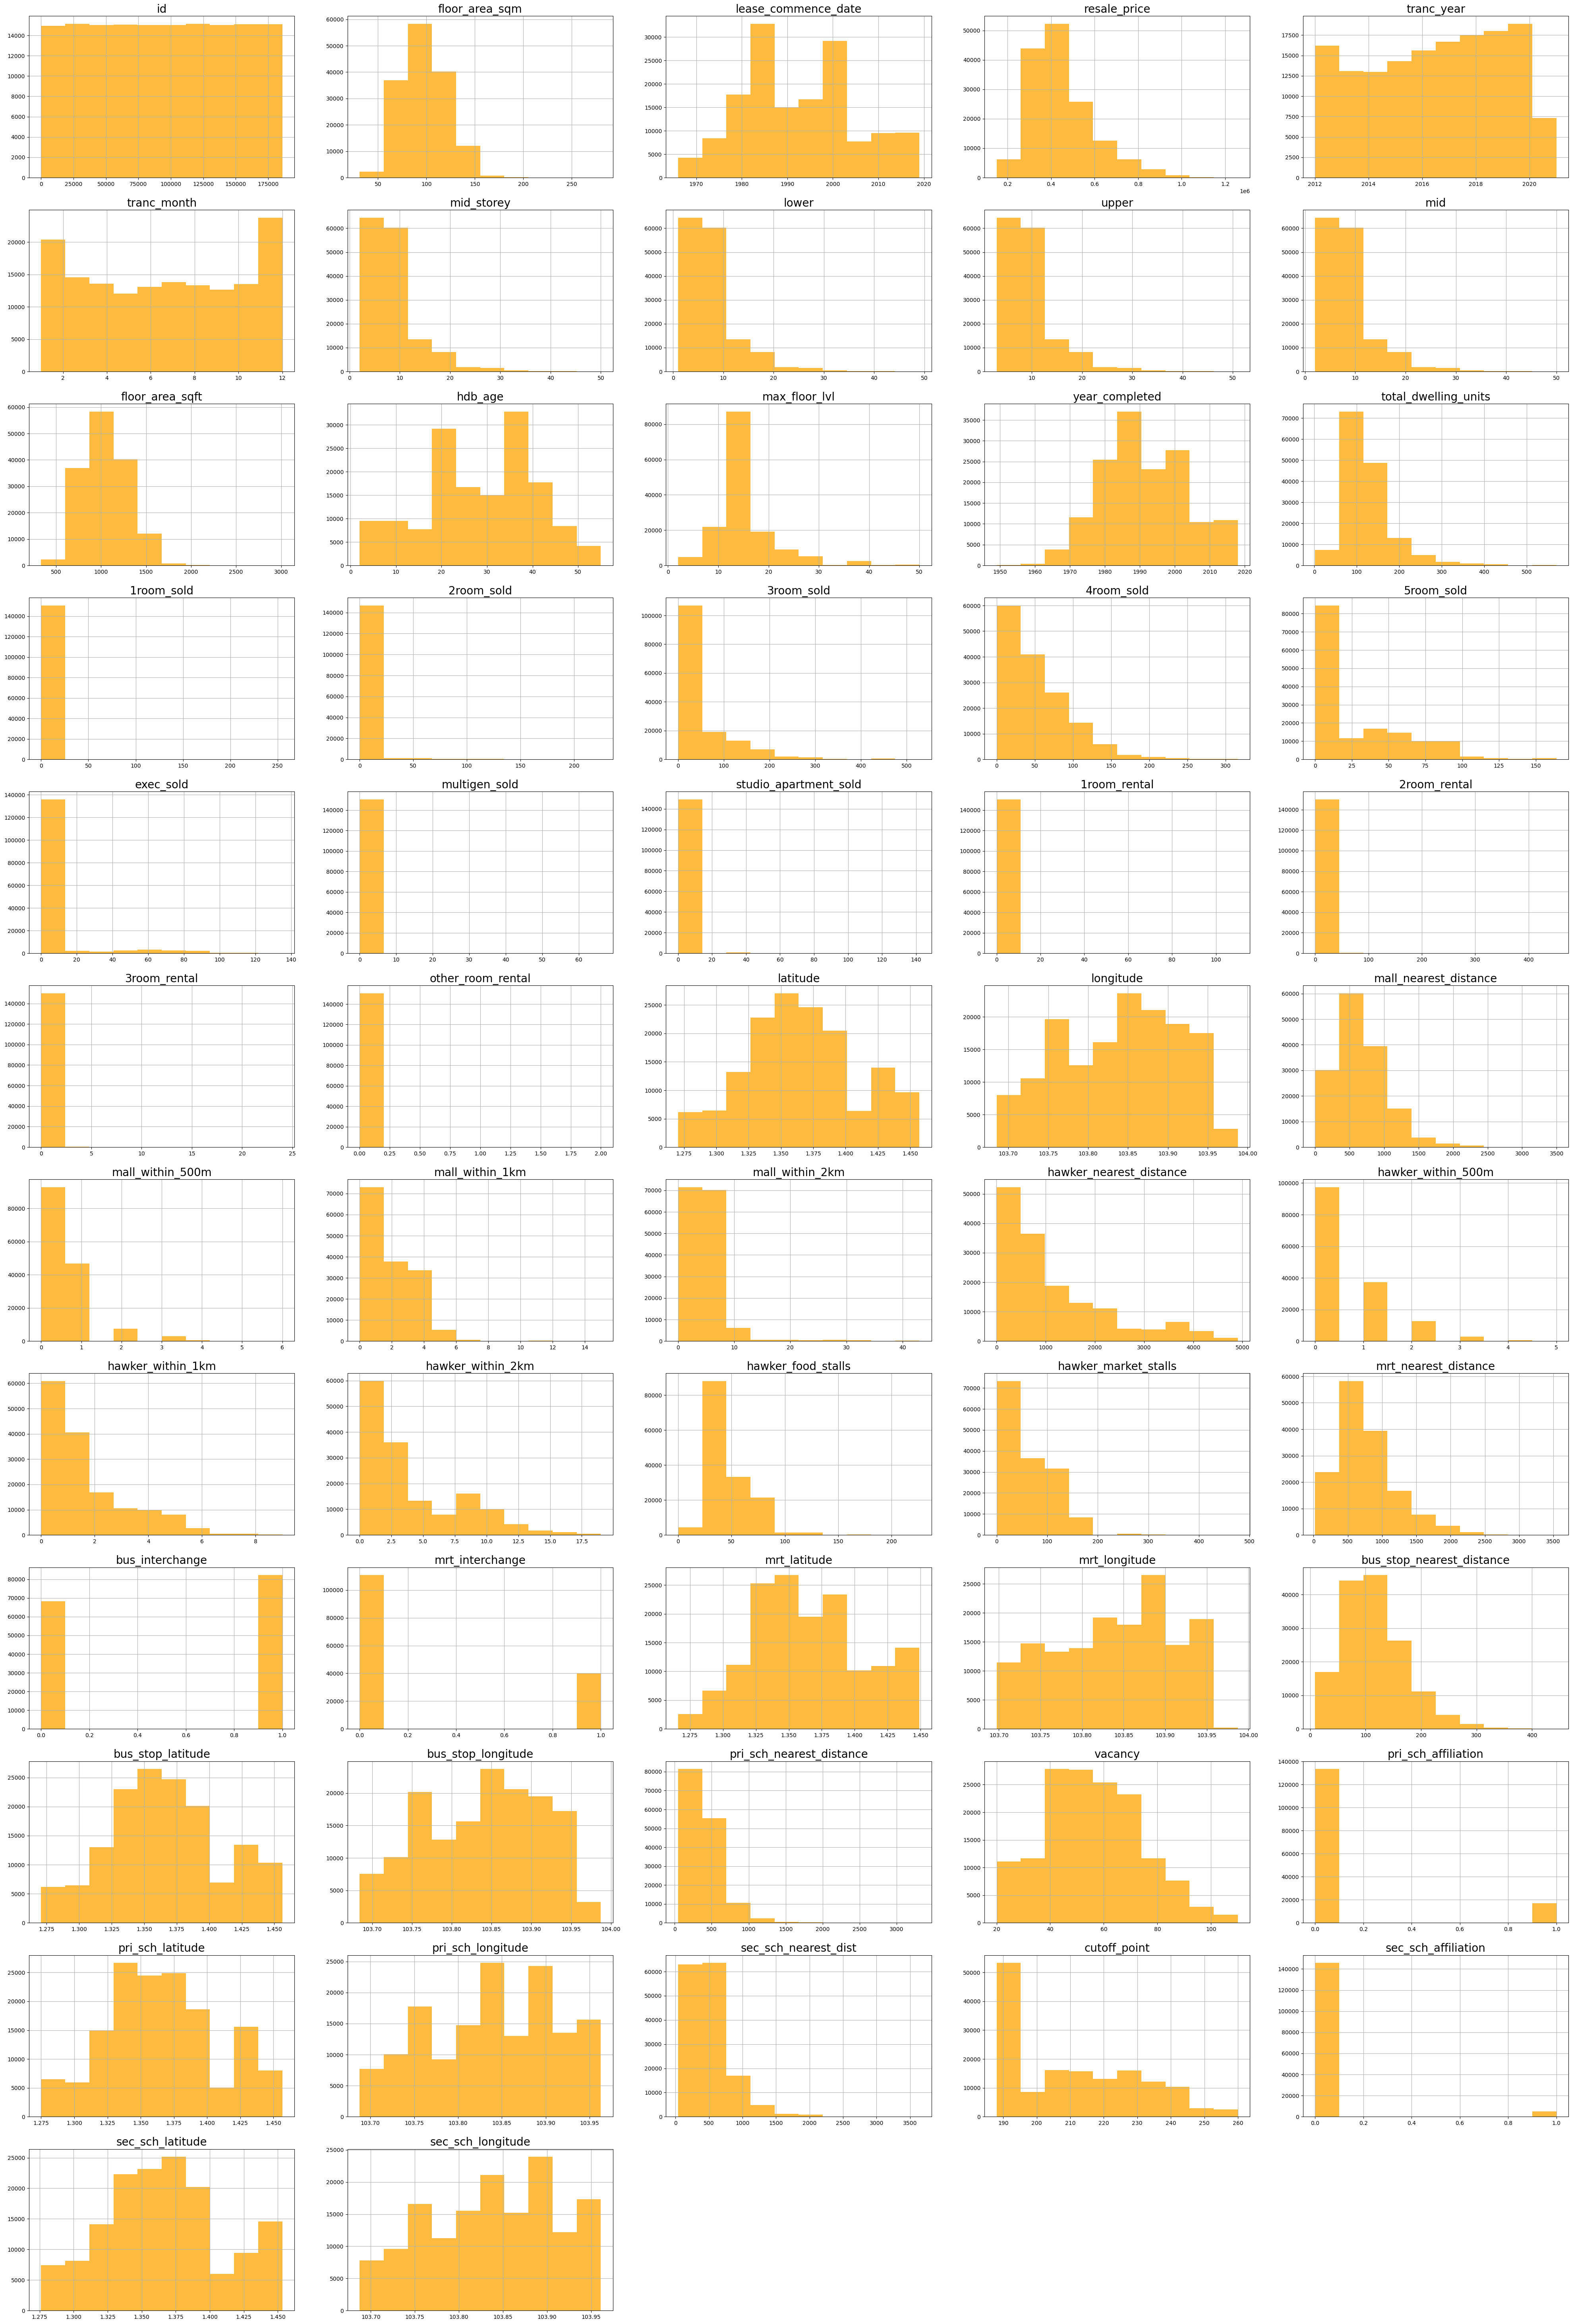

In [36]:
fig, axs = plt.subplots(12, 5, figsize=(50, 75), sharex=False, sharey=False)
col = hdb_train_numeric.columns.values[0:] 
i = 1

for k in range(0,len(col)):
    axi = plt.subplot(12,5,i)
    axi.set_title(col[k], fontsize=20)
    hdb_train_numeric.iloc[:, k].hist(bins=10, ax = axi, color='orange', alpha=0.75)
    i+=1
    
# remove unused axes
axs.flat[-1].set_visible(False)
axs.flat[-2].set_visible(False) 
axs.flat[-3].set_visible(False)

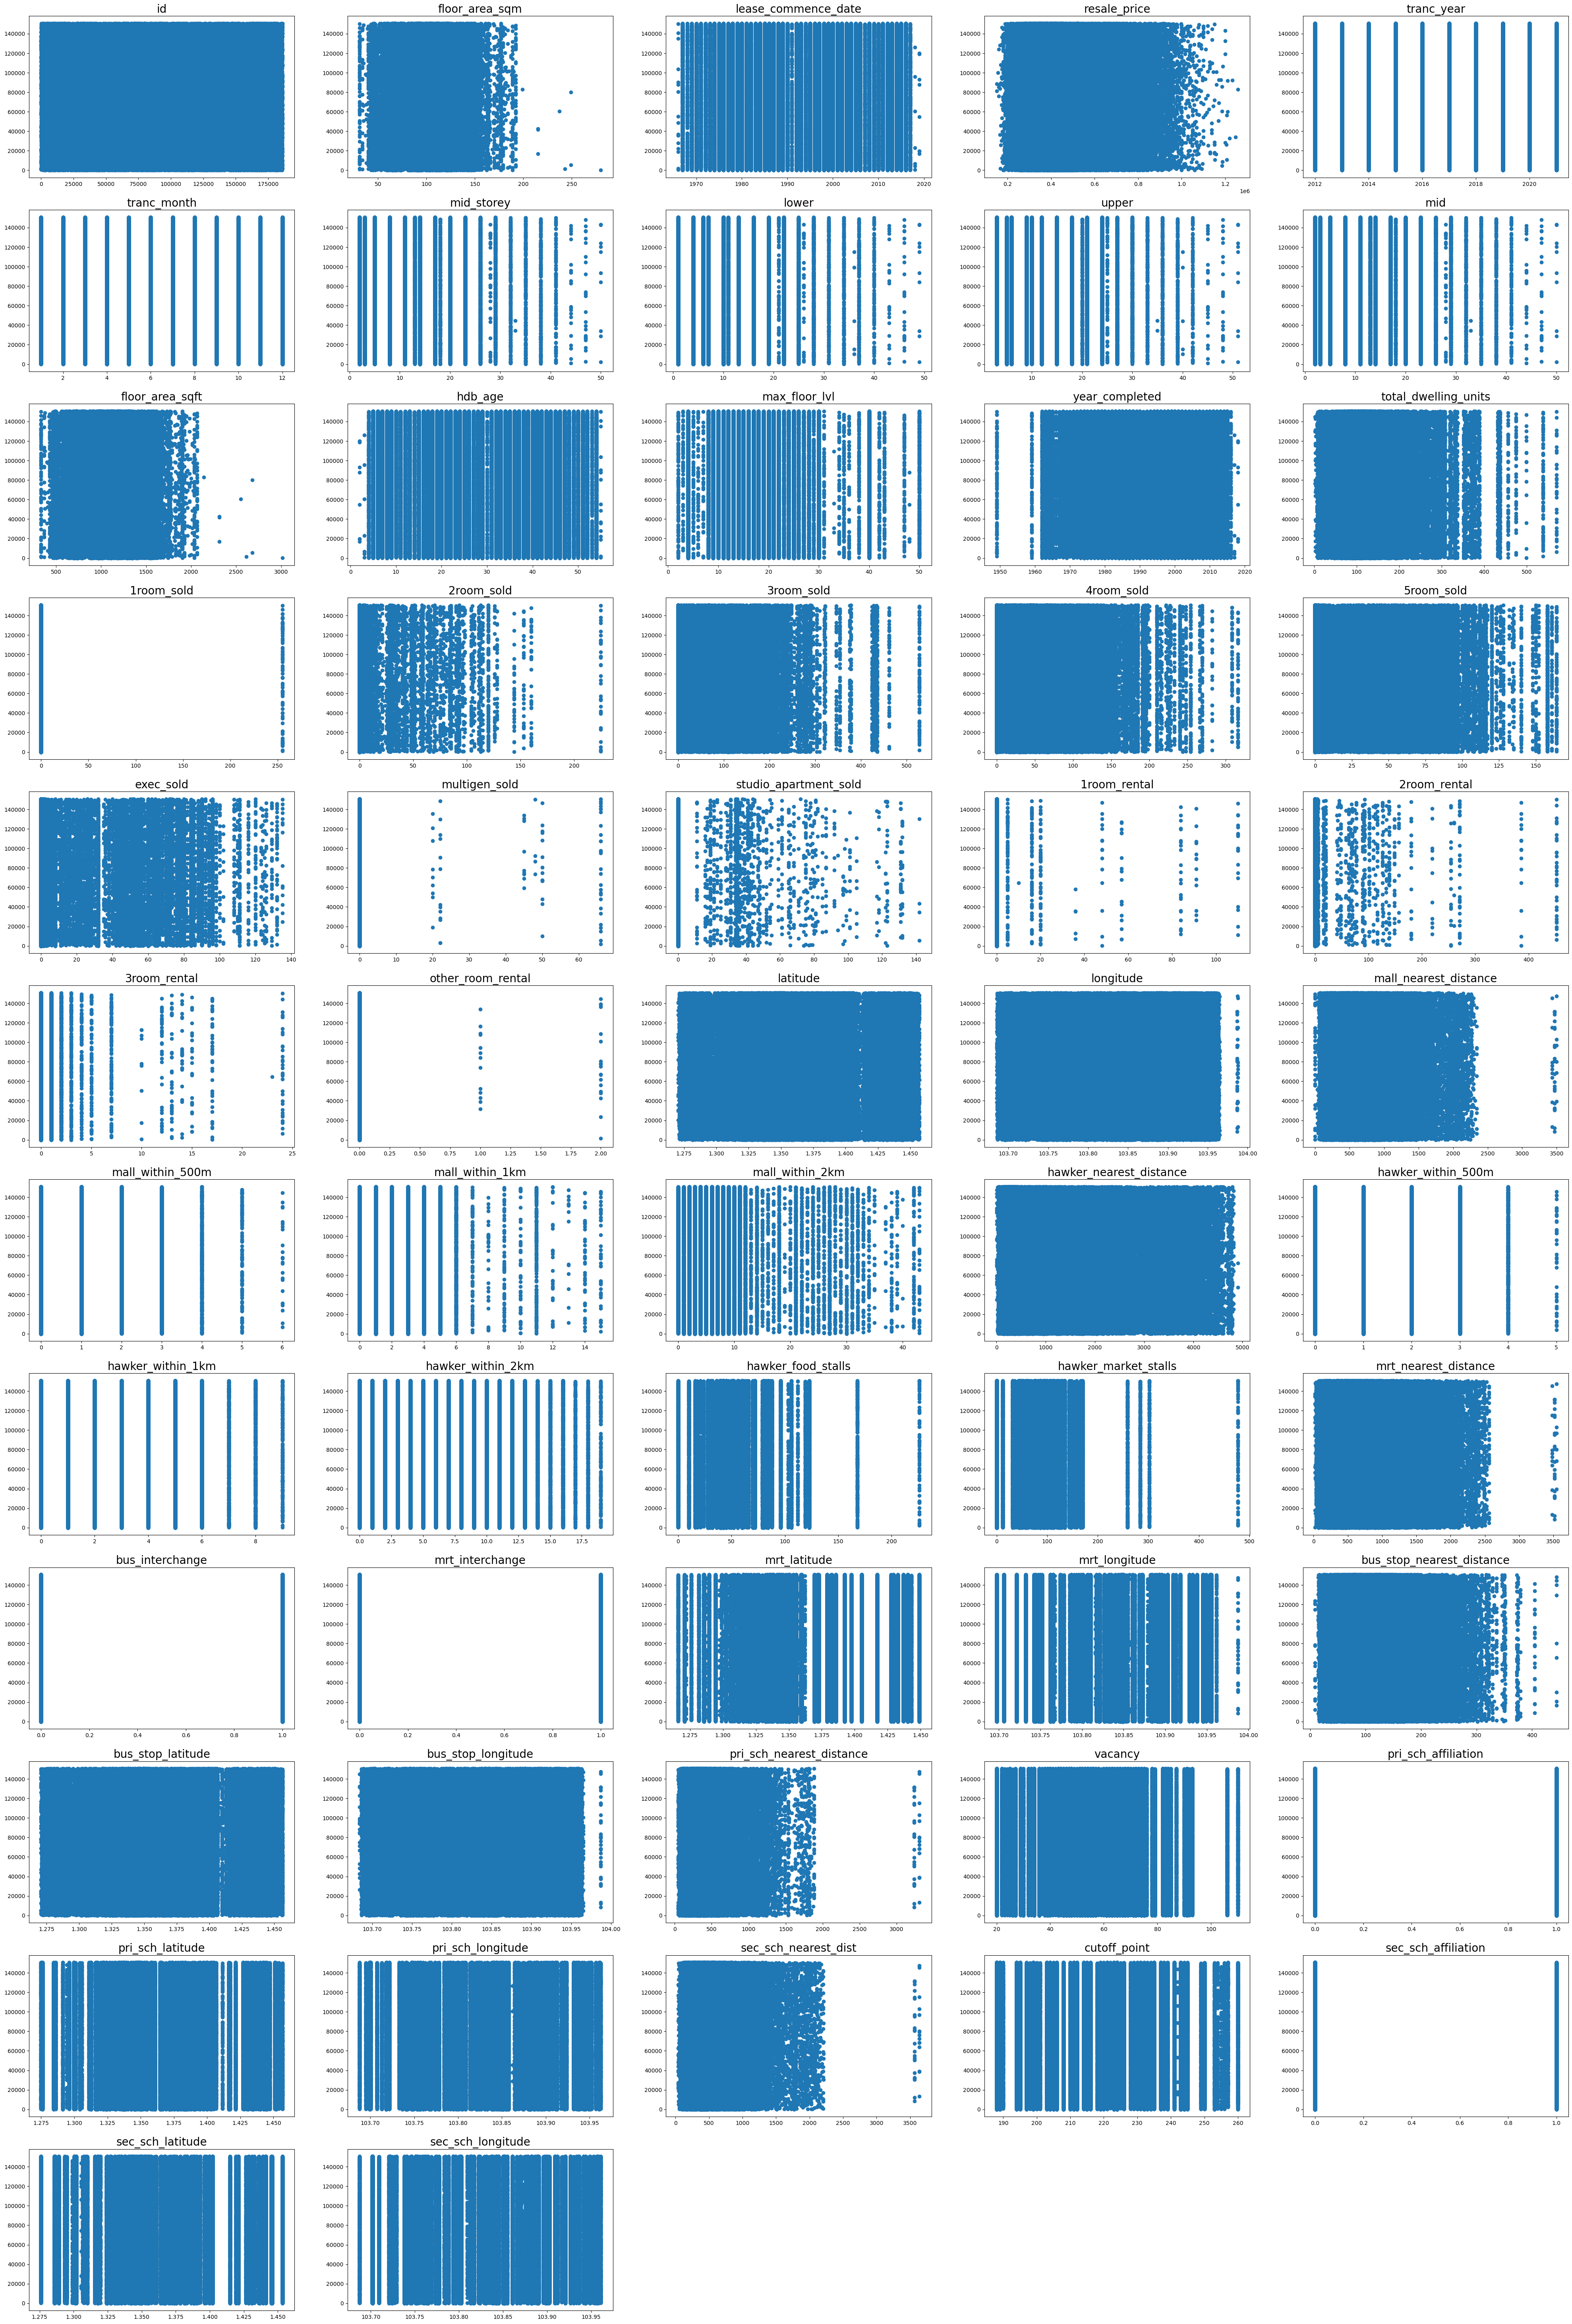

In [37]:
# Check numeric variables for outliers using scatterplots for univariate data
fig, axs = plt.subplots(12, 5, figsize=(50, 75), sharex=False, sharey=False)
col = hdb_train_numeric.columns.values[0:] 
i = 1

for k in range(0,len(col)):
    axi = plt.subplot(12,5,i)
    axi.set_title(col[k], fontsize=20)
    plt.scatter(hdb_train_numeric.iloc[:, k], hdb_train_numeric.index)
    i+=1
    
# remove unused axes
axs.flat[-1].set_visible(False)
axs.flat[-2].set_visible(False) 
axs.flat[-3].set_visible(False)

Comments: Some numeric variables are actually categorical variables or datetime objects - should be treated as so. Identify and correct the datatype for such variables. 

In [38]:
# Numeric variables that should be categorical (binary, nominal, ordinal) 

# Binary categorical variables: `bus_interchange`, 'mrt_interchange`, 'pri_sch_affiliation`, 'sec_sch_affiliation`
hdb_train['bus_interchange'] = hdb_train['bus_interchange'].astype('category')
hdb_train['mrt_interchange'] = hdb_train['mrt_interchange'].astype('category')
hdb_train['pri_sch_affiliation'] = hdb_train['pri_sch_affiliation'].astype('category')
hdb_train['sec_sch_affiliation'] = hdb_train['sec_sch_affiliation'].astype('category')

# Nominal categorical variables: 'id'
hdb_train['id'] = hdb_train['id'].astype('category')

# Datetime objects: 'tranc_month`, 'tranc_year'
hdb_train['tranc_month'] = pd.to_datetime(hdb_train['tranc_month'], format='%m')
hdb_train['tranc_year'] = pd.to_datetime(hdb_train['tranc_year'], format='%Y')

In [39]:
len(hdb_train_numeric.columns)

57

In [40]:
# Remove categorical and datetime variables from hdb_train_numeric
hdb_train_numeric.drop(columns=['id', 'tranc_year', 'tranc_month','bus_interchange', 'mrt_interchange', 
                                'pri_sch_affiliation', 'sec_sch_affiliation'], inplace=True)

In [41]:
len(hdb_train_numeric.columns)

50

*Check variables with categorical (binary, nominal, ordinal), datetime64, object datatypes.* 

In [42]:
# Check out categorical variables.
hdb_train_cat = hdb_train.select_dtypes(include = 'category')
len(hdb_train_cat.columns)

5

In [43]:
hdb_train_cat.describe()

id  bus_interchange  mrt_interchange  pri_sch_affiliation  \
count   150634           150634           150634               150634   
unique  150634                2                2                    2   
top          1                1                0                    0   
freq         1            82301           110863               133583   

        sec_sch_affiliation  
count                150634  
unique                    2  
top                       0  
freq                 145832

Comment: All the categorical variables have dichotomous values, except 'id'.

In [44]:
# Check out object variables.
hdb_train_obj = hdb_train.select_dtypes(include = 'object')
len(hdb_train_obj.columns)

20

In [45]:
hdb_train_obj.describe()

tranc_yearmonth         town flat_type   block     street_name  \
count           150634       150634    150634  150634          150634   
unique             110           26         7    2514             553   
top            2018-07  JURONG WEST    4 ROOM       2  YISHUN RING RD   
freq              2088        11451     61136     579            2451   

       storey_range flat_model  full_flat_type              address  \
count        150634     150634          150634               150634   
unique           25         20              43                 9157   
top        04 TO 06    Model A  4 ROOM Model A  91, TANGLIN HALT RD   
freq          34699      46261           35127                  106   

       residential commercial market_hawker multistorey_carpark  \
count       150634     150634        150634              150634   
unique           1          2             2                   2   
top              Y          N             N                   N   
freq        150634     121815        150619              150592   

       precinct_pavilion  postal planning_area mrt_name bus_stop_name  \
count             150634  150634        150634   150634        150634   
unique                 2    9125            32       94          1657   
top                    N  142091   Jurong West  Punggol       Blk 121   
freq              150499     106         11451     7671           774   

                    pri_sch_name                sec_sch_name  
count                     150634                      150634  
unique                       177                         134  
top     Marsiling Primary School  Bendemeer Secondary School  
freq                        2075                        3384

Comment: 
- `tranc_yearmonth` should be converted into datetime object.
- Object variables with dichotomous values should be label encoded and converted into categorical (boolean) data. 
- Ensure value consistency for remaining object variables with more than 2 unique values. The remaining object variables will be further explored and sorted into either ordinal or nominal datatypes - for feature selection & engineering. Nominal categorical variables would be dummy encoded while ordinal categorical variables would be label encoded to give the classes different weights.

In [46]:
# Convert datatype of 'tranc_yearmonth' to datetime object
hdb_train['tranc_yearmonth'] = pd.to_datetime(hdb_train['tranc_yearmonth'], format='%Y-%m')

In [47]:
# Label encoding variables with 2 unique values
hdb_train['residential'] = np.where(hdb_train['residential'].str.contains('Y'), 1, 0)
hdb_train['commercial'] = np.where(hdb_train['commercial'].str.contains('Y'), 1, 0)
hdb_train['market_hawker'] = np.where(hdb_train['market_hawker'].str.contains('Y'), 1, 0)
hdb_train['multistorey_carpark'] = np.where(hdb_train['multistorey_carpark'].str.contains('Y'), 1, 0)
hdb_train['precinct_pavilion'] = np.where(hdb_train['precinct_pavilion'].str.contains('Y'), 1, 0)

In [48]:
# Check that str values have been encoded into numerical form
binary_obj = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

for i in binary_obj: 
    print(f' { i } ')
    print(hdb_train[i].unique())

 residential 
[1]
 commercial 
[0 1]
 market_hawker 
[0 1]
 multistorey_carpark 
[0 1]
 precinct_pavilion 
[0 1]


In [49]:
# Convert all the binary objects into categorical datatype
hdb_train['residential'] = hdb_train['residential'].astype('category')
hdb_train['commercial'] = hdb_train['commercial'].astype('category')
hdb_train['market_hawker'] = hdb_train['market_hawker'].astype('category')
hdb_train['multistorey_carpark'] = hdb_train['multistorey_carpark'].astype('category')
hdb_train['precinct_pavilion'] = hdb_train['precinct_pavilion'].astype('category')

In [50]:
# Isolate remaining 14 object variables
hdb_train_obj = hdb_train.select_dtypes(include = 'object')
len(hdb_train_obj.columns)

14

In [51]:
# check for value consistency for variables with more than 2 unique values
# also convert them in categorical (nominal, ordinal) datatype
for i in hdb_train_obj: 
    print(f' ====================================={ i }======================================== ')
    print(hdb_train_obj[i].value_counts())
    hdb_train[i] = hdb_train[i].astype('category')

 =====================================town======================================== 
JURONG WEST        11451
WOODLANDS          11334
SENGKANG           11069
TAMPINES           10506
YISHUN             10042
BEDOK               9046
PUNGGOL             7793
HOUGANG             7555
ANG MO KIO          6908
CHOA CHU KANG       6343
BUKIT MERAH         5854
BUKIT PANJANG       5686
BUKIT BATOK         5623
TOA PAYOH           4817
PASIR RIS           4763
KALLANG/WHAMPOA     4340
QUEENSTOWN          4121
GEYLANG             3986
SEMBAWANG           3723
CLEMENTI            3633
JURONG EAST         3470
SERANGOON           3123
BISHAN              2871
CENTRAL AREA        1249
MARINE PARADE        959
BUKIT TIMAH          369
Name: town, dtype: int64
 =====================================flat_type======================================== 
4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                

In [52]:
# Update hdb_train_cat - there should be a total of 24 categorical variables now
hdb_train_cat = hdb_train.select_dtypes(include = 'category')
len(hdb_train_cat.columns)

24

Comment: After giving the output a quick scan, there are no different presentations of the same category for each variable. 

In [53]:
# Check out updated datetime64 variables
hdb_train_dt = hdb_train.select_dtypes(include = 'datetime64[ns]')
len(hdb_train_dt.columns)

3

In [54]:
hdb_train_dt.describe(datetime_is_numeric=True)

tranc_yearmonth                     tranc_year  \
count                         150634                         150634   
mean   2016-12-14 08:10:49.670061056  2016-06-28 03:33:07.296360704   
min              2012-03-01 00:00:00            2012-01-01 00:00:00   
25%              2014-08-01 00:00:00            2014-01-01 00:00:00   
50%              2017-03-01 00:00:00            2017-01-01 00:00:00   
75%              2019-05-01 00:00:00            2019-01-01 00:00:00   
max              2021-04-01 00:00:00            2021-01-01 00:00:00   

                         tranc_month  
count                         150634  
mean   1900-06-18 21:19:42.282884096  
min              1900-01-01 00:00:00  
25%              1900-04-01 00:00:00  
50%              1900-07-01 00:00:00  
75%              1900-09-01 00:00:00  
max              1900-12-01 00:00:00

Fix any incorrect datatypes in test set. Sort them into 3 main types: numeric (float64, int64), categorical (binary, nominal, ordinal), and datetime64.

In [55]:
# Get overview of datatypes in original hdb_test
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   tranc_yearmonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  tranc_year                 16737 non-null  int64  
 11  tranc_month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [56]:
# Binary categorical variables: `bus_interchange`, 'mrt_interchange`, 'pri_sch_affiliation`, 'sec_sch_affiliation`
hdb_test['bus_interchange'] = hdb_test['bus_interchange'].astype('category')
hdb_test['mrt_interchange'] = hdb_test['mrt_interchange'].astype('category')
hdb_test['pri_sch_affiliation'] = hdb_test['pri_sch_affiliation'].astype('category')
hdb_test['sec_sch_affiliation'] = hdb_test['sec_sch_affiliation'].astype('category')

# Nominal categorical variables: 'id'
hdb_test['id'] = hdb_test['id'].astype('category')

# Datetime objects: 'tranc_month`, 'tranc_year'
hdb_test['tranc_month'] = pd.to_datetime(hdb_test['tranc_month'], format='%m')
hdb_test['tranc_year'] = pd.to_datetime(hdb_test['tranc_year'], format='%Y')

In [57]:
# Convert datatype of 'tranc_yearmonth' to datetime object
hdb_test['tranc_yearmonth'] = pd.to_datetime(hdb_test['tranc_yearmonth'], format='%Y-%m')

In [58]:
# Label encoding variables with 2 unique values
hdb_test['residential'] = np.where(hdb_test['residential'].str.contains('Y'), 1, 0)
hdb_test['commercial'] = np.where(hdb_test['commercial'].str.contains('Y'), 1, 0)
hdb_test['market_hawker'] = np.where(hdb_test['market_hawker'].str.contains('Y'), 1, 0)
hdb_test['multistorey_carpark'] = np.where(hdb_test['multistorey_carpark'].str.contains('Y'), 1, 0)
hdb_test['precinct_pavilion'] = np.where(hdb_test['precinct_pavilion'].str.contains('Y'), 1, 0)

In [59]:
# Convert all the binary objects into categorical datatype
hdb_test['residential'] = hdb_test['residential'].astype('category')
hdb_test['commercial'] = hdb_test['commercial'].astype('category')
hdb_test['market_hawker'] = hdb_test['market_hawker'].astype('category')
hdb_test['multistorey_carpark'] = hdb_test['multistorey_carpark'].astype('category')
hdb_test['precinct_pavilion'] = hdb_test['precinct_pavilion'].astype('category')

In [60]:
# Convert 14 remaining object variables into categorical datatype
for i in hdb_test.select_dtypes(include = 'object'): 
    print(f' ====================================={ i }======================================== ')
    print(hdb_test.select_dtypes(include = 'object')[i].value_counts())
    hdb_test[i] = hdb_test[i].astype('category')

 =====================================town======================================== 
JURONG WEST        1246
SENGKANG           1242
WOODLANDS          1242
TAMPINES           1140
YISHUN             1096
BEDOK              1010
PUNGGOL             865
ANG MO KIO          824
HOUGANG             802
CHOA CHU KANG       714
BUKIT MERAH         655
BUKIT PANJANG       646
BUKIT BATOK         634
TOA PAYOH           560
PASIR RIS           543
KALLANG/WHAMPOA     508
QUEENSTOWN          469
GEYLANG             434
SEMBAWANG           401
CLEMENTI            389
SERANGOON           350
JURONG EAST         335
BISHAN              330
CENTRAL AREA        135
MARINE PARADE       126
BUKIT TIMAH          41
Name: town, dtype: int64
 =====================================flat_type======================================== 
4 ROOM              6867
3 ROOM              4364
5 ROOM              3992
EXECUTIVE           1264
2 ROOM               235
MULTI-GENERATION       8
1 ROOM                 7
Nam

*Check out numeric (int64, float64) variables.*

In [61]:
# There are 49 numeric features instead of 50 as it does not contain `resale_price`
hdb_test_numeric = hdb_test.select_dtypes(include = ['float64', 'int64'])
len(hdb_test_numeric.columns)

49

*Check out categorical (binary, nominal, ordinal) variables.*

In [62]:
# There are 24 categorical features
hdb_test_cat = hdb_test.select_dtypes(include = 'category')
len(hdb_test_cat.columns)

24

*Check out datetime variables.*

In [63]:
# There are 3 datetime variables
hdb_test_dt = hdb_test.select_dtypes(include = 'datetime64')
len(hdb_test_dt.columns)

3

*For `hdb_train` and `hdb_test`, ensure both datasets have the same unique values for each categorical variable.*

In [64]:
# List of 24 categorical variables in both hdb_train and hdb_test sets
X_cat = hdb_train_cat.columns.tolist()
print(X_cat)

['id', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'full_flat_type', 'address', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'postal', 'planning_area', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'bus_stop_name', 'pri_sch_name', 'pri_sch_affiliation', 'sec_sch_name', 'sec_sch_affiliation']


In [65]:
# Create a new dataframe to compare the unique values for each categorical variable

# Initialize a blank dataframe and keep adding 
df = pd.DataFrame(columns = ['Feature', 'train_count', 'test_count', 
                             'train_count == test_count']) 
j = 0 

# Add record to dataframe using the .loc function 
for i in X_cat: 
    df.loc[j] = [ i , 
                 hdb_train_cat[i].nunique(), 
                 hdb_test_cat[i].nunique(), 
                 int(hdb_train_cat[i].nunique() == hdb_test_cat[i].nunique()) ]
    j += 1
print(df) 

                Feature  train_count  test_count  train_count == test_count
0                    id       150634       16737                          0
1                  town           26          26                          1
2             flat_type            7           7                          1
3                 block         2514        2248                          0
4           street_name          553         545                          0
5          storey_range           25          23                          0
6            flat_model           20          19                          0
7        full_flat_type           43          40                          0
8               address         9157        7044                          0
9           residential            1           1                          1
10           commercial            2           2                          1
11        market_hawker            2           1                          0
12  multisto

Comments: 

If number of unique values for hdb_train does not match that of hdb_test (0), keep them in view:
> * Mismatched features that will be dummy encoded have to be preprocessed (aligned) during feature selection, before modeling. 
> * For mismatched features that will be label encoded, it is not neccessary to align the number of unique values for train.csv and test.csv.

## Updated Data Dictionary (Post-Cleaning) - Sorted based on Datatype

|Feature|Datatype|Description|
|---|---|---|
|tranc_year|datetime64|year of resale transaction|
|tranc_month|datetime64|month of resale transaction|
|tranc_yearmonth|datetime64|year and month of the resale transaction, e.g. 2015-02| 
|residential|categorical (boolean)|boolean value if resale flat has residential units in the same block|
|commercial|categorical (boolean)|boolean value if resale flat has commercial units in the same block|
|market_hawker|categorical (boolean)|boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark|categorical (boolean)|boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion|categorical (boolean)|boolean value if resale flat has a pavilion in the same block|
|bus_interchange|categorical (boolean)|boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange|categorical (boolean)|boolean value if the nearest MRT station is a train interchange station|
|pri_sch_affiliation|categorical (boolean)|boolean value if the nearest primary school has a secondary school affiliation|
|sec_sch_affiliation|categorical (boolean)|boolean value if the nearest secondary school has an primary school affiliation|
|id|categorical (nominal)|identification number of each resale unit|
|postal|categorical (nominal)|postal code of the resale flat block|
|street_name|categorical (nominal)|street name where the resale flat resides, e.g. TAMPINES ST 42|
|block|categorical (nominal)|block number of the resale flat, e.g. 454|
|address|categorical (nominal)|*combination of block and street_name*|
|town|categorical (nominal)|HDB township where the flat is located, e.g. TANJONG PAGAR|
|planning_area|categorical (nominal)|government planning area that the flat is located|
|flat_model|categorical (nominal)|HDB model of the resale flat, e.g. Multi Generation|
|full_flat_type|categorical (nominal)|combination of flat_type and flat_model|
|mrt_name|categorical (nominal)|name of the nearest MRT station|
|bus_stop_name|categorical (nominal)|name of the nearest bus stop|
|pri_sch_name|categorical (nominal)|name of the nearest primary school|
|sec_sch_name|categorical (nominal)|name of the nearest secondary school|
|flat_type|categorical (ordinal)|type of the resale flat unit, e.g. 3 ROOM|
|storey_range|categorical (ordinal)|floor level (range) of the resale flat unit, e.g. 07 TO 09|
|hdb_age|numeric (int64)|number of years from lease_commence_date to present year|
|year_completed|numeric (int64)|year which construction was completed for resale flat|
|lease_commence_date|numeric (int64)|commencement year of the flat unit's 99-year lease|
|max_floor_lvl|numeric (int64)|highest floor of the resale flat|
|mid_storey|numeric (int64)|*median value of storey_range*|
|lower|numeric (int64)|*lower value of storey_range*|
|upper|numeric (int64)|*upper value of storey_range*|
|mid|numeric (int64)|*middle value of storey_range*|
|total_dwelling_units|numeric (int64)|total number of residential dwelling units in the resale flat|
|1room_sold|numeric (int64)|number of 1-room residential units in the resale flat|
|2room_sold|numeric (int64)|number of 2-room residential units in the resale flat|
|3room_sold|numeric (int64)|number of 3-room residential units in the resale flat|
|4room_sold|numeric (int64)|number of 4-room residential units in the resale flat|
|5room_sold|numeric (int64)|number of 5-room residential units in the resale flat|
|exec_sold|numeric (int64)|number of executive type residential units in the resale flat block|
|multigen_sold|numeric (int64)|number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold|numeric (int64)|number of studio apartment type residential units in the resale flat block|
|1room_rental|numeric (int64)|number of 1-room rental residential units in the resale flat block|
|2room_rental|numeric (int64)|number of 2-room rental residential units in the resale flat block|
|3room_rental|numeric (int64)|number of 3-room rental residential units in the resale flat block|
|other_room_rental|numeric (int64)|number of "other" type rental residential units in the resale flat block|
|hawker_food_stalls|numeric (int64)|number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls|numeric (int64)|number of hawker and market stalls in the nearest hawker centre|
|vacancy|numeric (int64)|number of vacancies in the nearest primary school|
|cutoff_point|numeric (int64)|PSLE cutoff point of the nearest secondary school|
|floor_area_sqm|numeric (float64)|floor area of the resale flat unit in square metres|
|floor_area_sqft|numeric (float64)|floor area of the resale flat unit in square feet|
|latitude|numeric (float64)|latitude based on postal code|
|longitude|numeric (float64)|longitude based on postal code|
|mall_nearest_distance|numeric (float64)|distance (in metres) to the nearest mall|
|mall_within_500m|numeric (float64)|number of malls within 500 metres|
|mall_within_1km|numeric (float64)|number of malls within 1 kilometre|
|mall_within_2km|numeric (float64)|number of malls within 2 kilometres|
|hawker_nearest_distance|numeric (float64)|distance (in metres) to the nearest hawker centre|
|hawker_within_500m|numeric (float64)|number of hawker centres within 500 metres|
|hawker_within_1km|numeric (float64)|number of hawker centres within 1 kilometre|
|hawker_within_2km|numeric (float64)|number of hawker centres within 2 kilometres|
|mrt_nearest_distance|numeric (float64)|distance (in metres) to the nearest MRT station|
|mrt_latitude|numeric (float64)|latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude|numeric (float64)|longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance|numeric (float64)|distance (in metres) to the nearest bus stop|
|bus_stop_latitude|numeric (float64)|latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude|numeric (float64)|longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance|numeric (float64)|distance (in metres) to the nearest primary school|
|pri_sch_latitude|numeric (float64)|latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude|numeric (float64)|longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist|numeric (float64)|distance (in metres) to the nearest secondary school|
|sec_sch_latitude|numeric (float64)|latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude|numeric (float64)|longitude (in decimal degrees) of the nearest secondary school|
|resale_price| numeric (float64)|the property's sale price in Singapore dollars|

<br>
<div style="text-align: right"> Source: Housing Development Board (HDB), 2023</div>
<br>

In [66]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   tranc_yearmonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  category      
 3   flat_type                  150634 non-null  category      
 4   block                      150634 non-null  category      
 5   street_name                150634 non-null  category      
 6   storey_range               150634 non-null  category      
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  category      
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  datetime

In [69]:
len(hdb_train)

150634

In [67]:
# create hdb_train.csv, in a datatype aware format to retain the datatypes
hdb_train.to_pickle('../data/hdb_train.csv')

In [68]:
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         16737 non-null  category      
 1   tranc_yearmonth            16737 non-null  datetime64[ns]
 2   town                       16737 non-null  category      
 3   flat_type                  16737 non-null  category      
 4   block                      16737 non-null  category      
 5   street_name                16737 non-null  category      
 6   storey_range               16737 non-null  category      
 7   floor_area_sqm             16737 non-null  float64       
 8   flat_model                 16737 non-null  category      
 9   lease_commence_date        16737 non-null  int64         
 10  tranc_year                 16737 non-null  datetime64[ns]
 11  tranc_month                16737 non-null  datetime64[ns]
 12  mid_

In [70]:
len(hdb_test)

16737

In [75]:
# create hdb_test.csv, in a datatype aware format to retain the datatypes
hdb_test.to_pickle('../data/hdb_test.csv')